<a href="https://colab.research.google.com/github/AdriaDelhom/CGM/blob/main/mag_explores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
os.chdir('/content/drive/MyDrive/CGM/data')
os.listdir() # this will return the file contents # maggie testing 123456 #now I can put stuff in this file

Mounted at /content/drive


['001',
 '002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '010',
 '011',
 '012',
 '013',
 '014',
 '015',
 '016',
 'Demographics.csv',
 'LICENSE.txt',
 'SHA256SUMS.txt']

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
os.listdir('001')

['ACC_001.csv',
 'BVP_001.csv',
 'Dexcom_001.csv',
 'EDA_001.csv',
 'Food_Log_001.csv',
 'HR_001.csv',
 'IBI_001.csv',
 'TEMP_001.csv']

Import the data but leave out the last 20%. Created my own functions because I want to use percentages not integers. I think you need to know the # of indices to use TimeSeriesSplit

In [ ]:
# get training data
def get_train(x,y=.8): # x is your variable, y is the % you want to leave out for testing
    tmp = round(y*len(x))
    x = x[:tmp]
    return x

In [ ]:
# get testing data
def get_test(x,y=.8): # x is your variable, y is the % you want to leave out for testing
    tmp = round((1-y)*len(x))
    x = x[-tmp:]
    return x

In [ ]:
# load data
dexcom_full = pd.read_csv('001/Dexcom_001.csv')
hr_full = pd.read_csv('001/HR_001.csv')
acc_full = pd.read_csv('001/ACC_001.csv')
bvp_full = pd.read_csv('001/BVP_001.csv')
eda_full = pd.read_csv('001/EDA_001.csv')
food_full = pd.read_csv('001/Food_Log_001.csv')
ibi_full = pd.read_csv('001/IBI_001.csv')
temp_full = pd.read_csv('001/TEMP_001.csv')

In [ ]:
# grab training sets
dexcom = get_train(dexcom_full)[12:]
hr = get_train(hr_full)
acc = get_train(acc_full)
bvp = get_train(bvp_full)
eda = get_train(eda_full)
food = get_train(food_full)
ibi = get_train(ibi_full)
temp = get_train(temp_full)

Need to convert dates to datetime (can check if possible to combine the below dexcom lines)

In [ ]:
dexcom['datetime'] = dexcom['Timestamp (YYYY-MM-DDThh:mm:ss)']
dexcom['datetime'] = pd.to_datetime(dexcom['datetime'])

plot glucose values

<Axes: xlabel='datetime'>

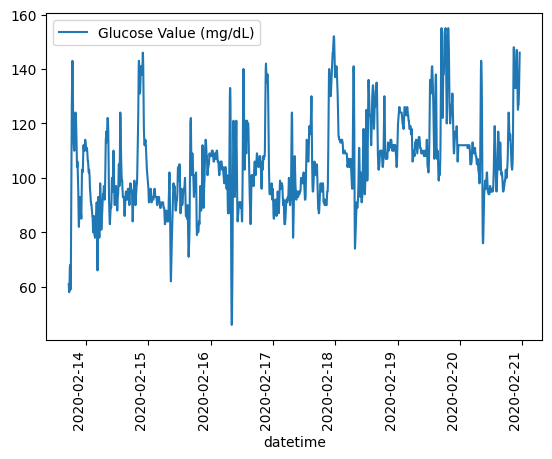

In [ ]:
dexcom.plot(x='datetime', y='Glucose Value (mg/dL)', rot='vertical')

Convert temp datetime to datetime

In [ ]:
temp['datetime'] = pd.to_datetime(temp['datetime'])

<ipython-input-119-1b7a2a048d8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['datetime'] = pd.to_datetime(temp['datetime'])


Plot temp values

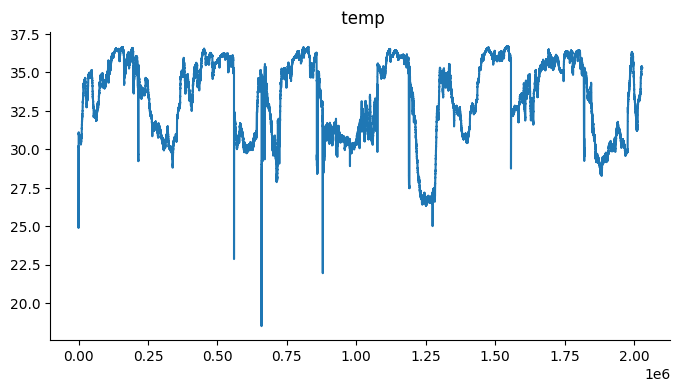

In [ ]:
from matplotlib import pyplot as plt
temp[' temp'].plot(kind='line', figsize=(8, 4), title=' temp')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# plot temp

# temp_dropna.plot(y='temp')

plt.plot(temp['temp'])

KeyError: 'temp'